<a href="https://colab.research.google.com/github/Sanpme66/prediction-of-compressive-strength-of-concrete-using-artificial-neural-network/blob/master/prediction%20of%20compressive%20strength%20of%20concrete%20using%20artificial%20neural%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Predicting Compressive Strength of Concrete


In [0]:
#importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [0]:
data = pd.read_excel('/content/Concrete_Data.xls')

Data exploring and visualizing,Manipulating

In [0]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


Renaming colums 
>To better Understanding and fast using key words 

In [0]:
data = data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"furnace_slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)':"fly_ash",
       'Water  (component 4)(kg in a m^3 mixture)':"water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)':"super_plasticizer",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarse_agg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fine_agg", 'Age (day)':"age",
       'Concrete compressive strength(MPa, megapascals) ':"compressive_strength"})

Checking data type (info)

In [0]:
data.info()

Checking null values 

In [0]:
print (data.isnull().sum())

Exploring statistics info of data 

In [0]:
data.describe().T

Observations


1.   compressive strength of concrete had a range of 2.3 MPa to 82.6 MPa and 75% of data lies in < 46.1 MPa we need to find outliers 
2.Check how it's look like in graph 



Checking skewness

In [0]:
plt.figure(figsize=(13,6))
#using distplot() to draw a kernel density estimate line 
sns.distplot(data["compressive_strength"],color="b",rug=True)
#axvline() to plot mean line 
plt.axvline(data["compressive_strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressivee strength distribution")
plt.show()

In [0]:
print(data.median())

Cement (component 1)(kg in a m^3 mixture)                272.900000
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     22.000000
Fly Ash (component 3)(kg in a m^3 mixture)                 0.000000
Water  (component 4)(kg in a m^3 mixture)                185.000000
Superplasticizer (component 5)(kg in a m^3 mixture)        6.350000
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     968.000000
Fine Aggregate (component 7)(kg in a m^3 mixture)        779.510000
Age (day)                                                 28.000000
Concrete compressive strength(MPa, megapascals)           34.442774
dtype: float64


In [0]:
print(data.mode())

   Cement (component 1)(kg in a m^3 mixture)  ...  Concrete compressive strength(MPa, megapascals) 
0                                      362.6  ...                                         33.398217
1                                      425.0  ...                                               NaN

[2 rows x 9 columns]


Comments:

1. As i said before mean lies less than 40MPa where 75% of data under 46 MPa
2. So mean>median>mode == 35.82>34.4>33.39  as seen in figure it's  -ve skewness




visualization of all dataset features


* So that i'm using loop function lib called itertools 
*   [itertools link](https://docs.python.org/3/library/itertools.html)



In [0]:
#using itertools — Functions creating iterators for efficient looping
import itertools
%matplotlib inline
cols = [i for i in data.columns if i not in 'compressive_strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(data[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

Comments:

##Box plots
To find outlier 

In [0]:
plt.subplots(figsize=(16, 8))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#Observations
*   Age column appears to be having maximum number of outliers
* Slag, Water, superplastic, fineagg features have some outliers 
* All features except age and strength have same units(kg in m3 mixture) but have different scales. Thus we might need to scale the data so as to avoid bias(underfit) in algorithms 



In [0]:
plt.figure(figsize=(6,6))
sns.pairplot(data,markers="h")
plt.show()
plt.close()

Checking correlation b/w all variables 

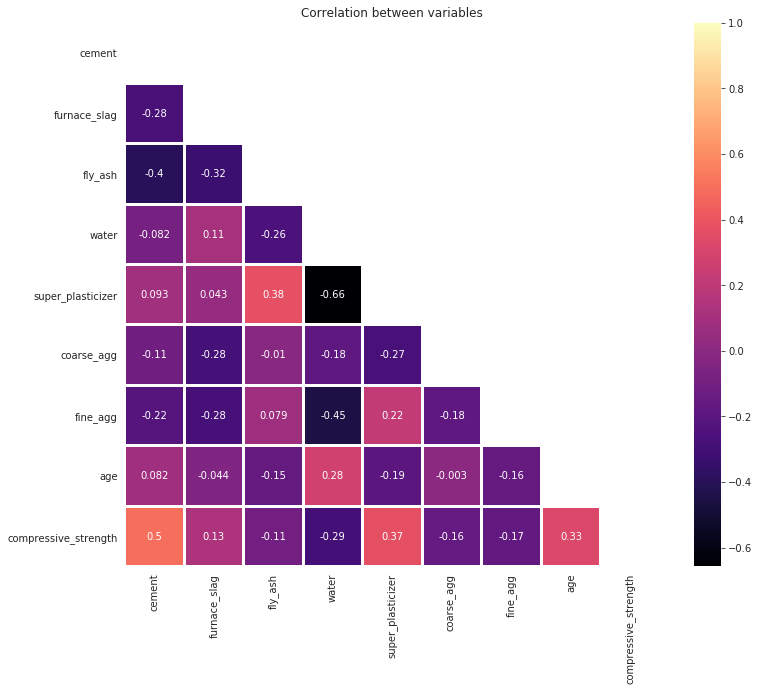

In [0]:
cor_v = data.corr()

mask = np.zeros_like(cor_v)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))

with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,
                mask = mask,cmap="magma")
plt.title("Correlation between variables")
plt.show()

In [0]:
x_ind = data.iloc[0:1030,[0,1,2,3,4,5,6,7]]
x_ind.shape

In [0]:
y_dep = data.iloc[0:1030,[8]]
y_dep.shape

In [0]:
vect_x_ind = x_ind.values
vect_y_dep =y_dep.values

In [0]:
from sklearn.preprocessing import MinMaxScaler
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(x_ind)
y_scaled = scaler.fit_transform(y_dep)
print(x_scaled)
print(y_scaled)

In [0]:
print(vect_x_ind)

In [0]:
print(vect_y_dep)

In [0]:
print(x_ind.keys())

In [0]:
print(x_scaled.shape)
print(y_scaled.shape)